<a href="https://colab.research.google.com/github/lucasvx273/Machine_Learning_LPS/blob/main/Sklearn_aplicado_Binary_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [6]:
df = pd.read_excel("/content/teste2 - binary.xlsx")
df.head(3)

,ID,Binary,Curva Curta,Curva Media,Curva Longa,Momento,Situação,5 Baixa,3 Baixa,3 Alta,5 Alta
0,61,40851.72,40861.788571,40853.662500,40849.262069,2022-02-27 08:13:26.817,Baixa,0,0,0,0
1,62,40844.46,40861.583571,40854.007857,40849.686034,2022-02-27 08:13:27.827,Baixa,0,0,0,0
2,63,40849.54,40860.434286,40853.911429,40850.012931,2022-02-27 08:13:28.844,Alta,0,0,0,0


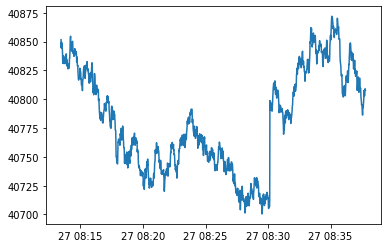

In [9]:
xi = df["Binary"]
yi = df["Momento"]

plt.plot(yi, xi)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e80d45c50>,
      dtype=object)

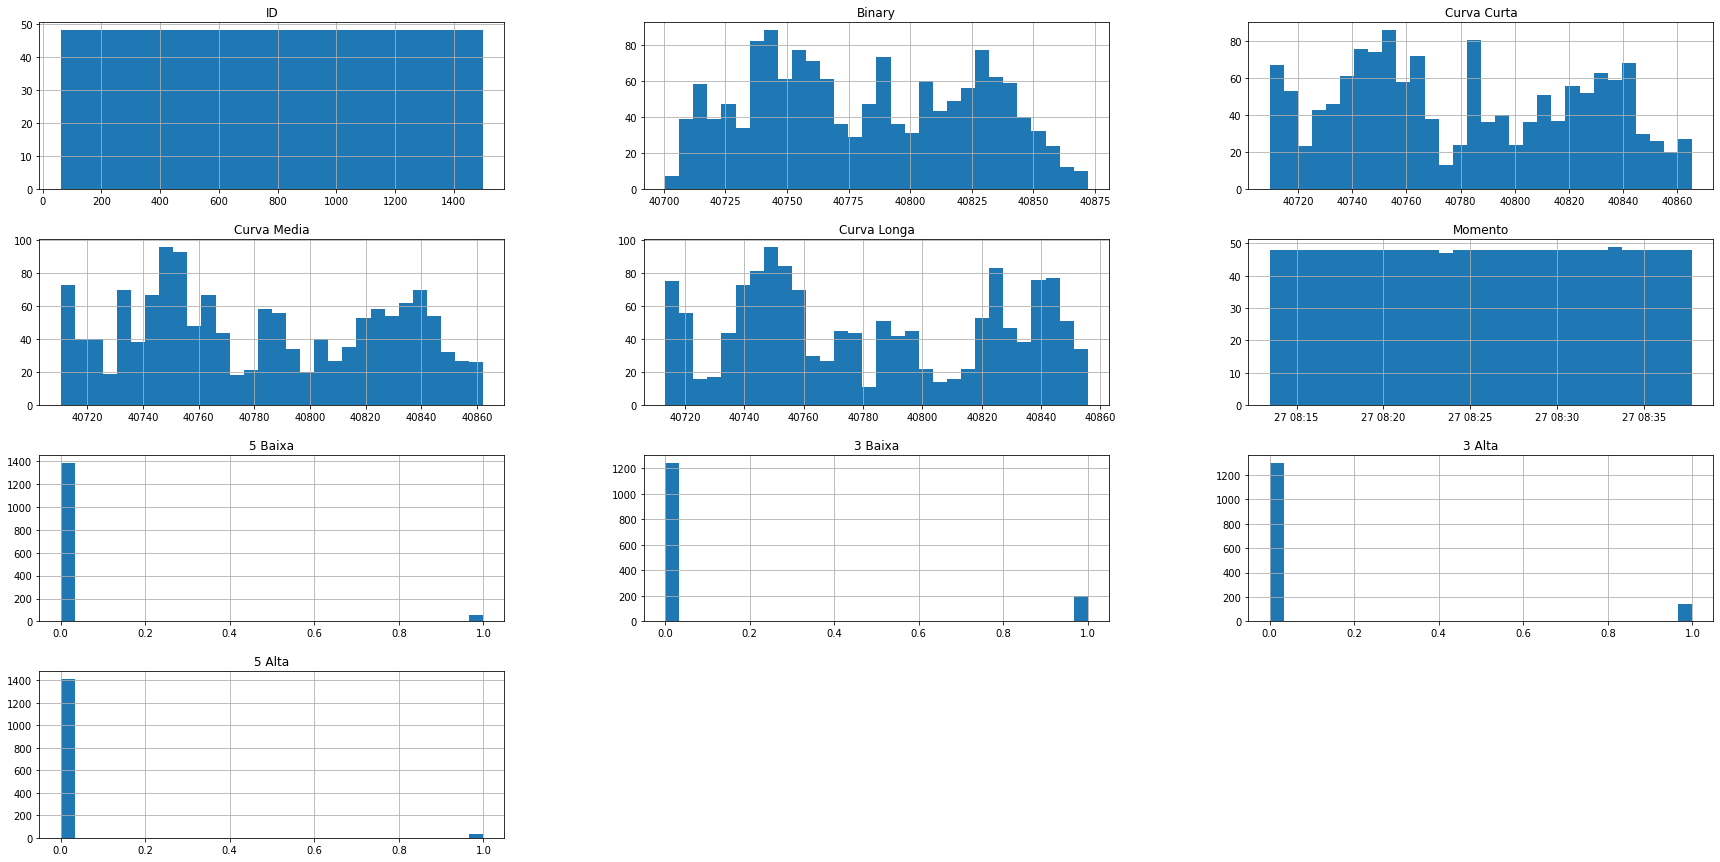

In [12]:
df.hist(bins=30, figsize=(30,15))

In [26]:
df = df.drop(["Momento"],axis=1)

In [38]:
df = df.drop(["Situação"],axis=1)

In [15]:
one_hot = pd.get_dummies(df["Situação"])

one_hot.head()

,Alta,Baixa
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [16]:
df = df.join(one_hot)

df.head()

,ID,Binary,Curva Curta,Curva Media,Curva Longa,Momento,Situação,5 Baixa,3 Baixa,3 Alta,5 Alta,Alta,Baixa
0,61,40851.72,40861.788571,40853.662500,40849.262069,2022-02-27 08:13:26.817,Baixa,0,0,0,0,0,1
1,62,40844.46,40861.583571,40854.007857,40849.686034,2022-02-27 08:13:27.827,Baixa,0,0,0,0,0,1
2,63,40849.54,40860.434286,40853.911429,40850.012931,2022-02-27 08:13:28.844,Alta,0,0,0,0,1,0
3,64,40849.43,40859.827143,40854.118929,40850.427414,2022-02-27 08:13:29.855,Baixa,0,0,0,0,0,1
4,65,40844.94,40859.115714,40854.192857,40850.681552,2022-02-27 08:13:30.867,Baixa,0,0,0,0,0,1


In [39]:
df.dtypes

ID               int64
Binary         float64
Curva Curta    float64
Curva Media    float64
Curva Longa    float64
5 Baixa          int64
3 Baixa          int64
3 Alta           int64
5 Alta           int64
Alta             uint8
Baixa            uint8
dtype: object

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
Y = df["Binary"]
X = df.loc[:, df.columns != "Binary"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
rf_reg.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([40718.4477])

In [49]:
#Agora bateria de testes:

n = 0

print("Valor atual: ", y_test.iloc[n])
print("Dados:\n", x_test.iloc[n].head(10))

predicao = rf_reg.predict(x_test.iloc[n].values.reshape(1,-1))
print("\nA predição é de: ", predicao, "\n\n")

Valor atual:  40720.96
Dados:
 ID               915.000000
Curva Curta    40715.050000
Curva Media    40717.173929
Curva Longa    40726.716897
5 Baixa            0.000000
3 Baixa            0.000000
3 Alta             0.000000
5 Alta             0.000000
Alta               1.000000
Baixa              0.000000
Name: 854, dtype: float64

A predição é de:  [40718.4477] 




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
